# IMPORTING LIBRARIES

In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns

# LOADING OF DATA SET 

In [89]:
Data_frame = pd.read_csv('suv_data.csv')
Data_frame.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [90]:
Data_frame.shape

(400, 5)

# ANALYZING THE DATASET

<AxesSubplot:xlabel='Purchased', ylabel='count'>

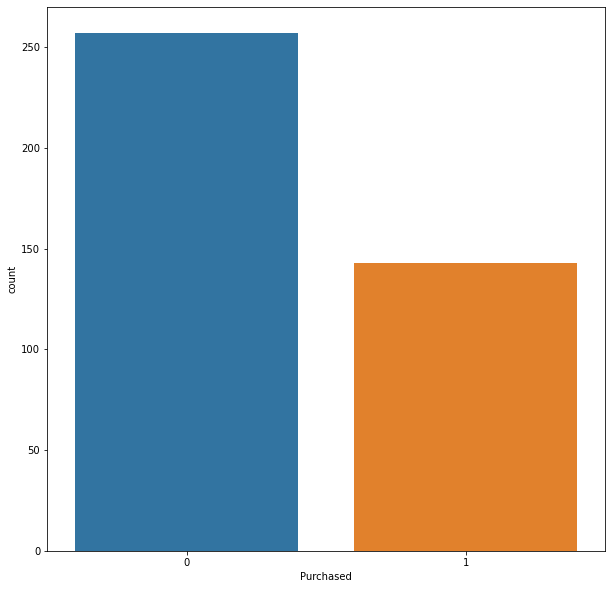

In [91]:
sns.countplot(x='Purchased',data=Data_frame)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

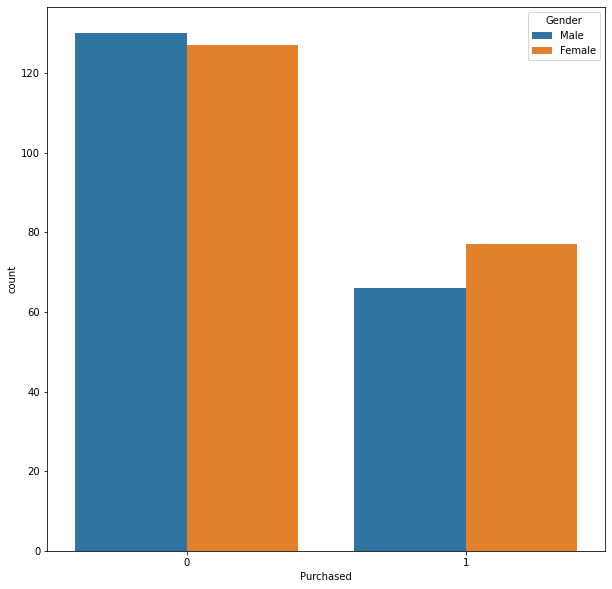

In [92]:
sns.countplot(x='Purchased',hue= 'Gender',data=Data_frame)

<AxesSubplot:ylabel='Frequency'>

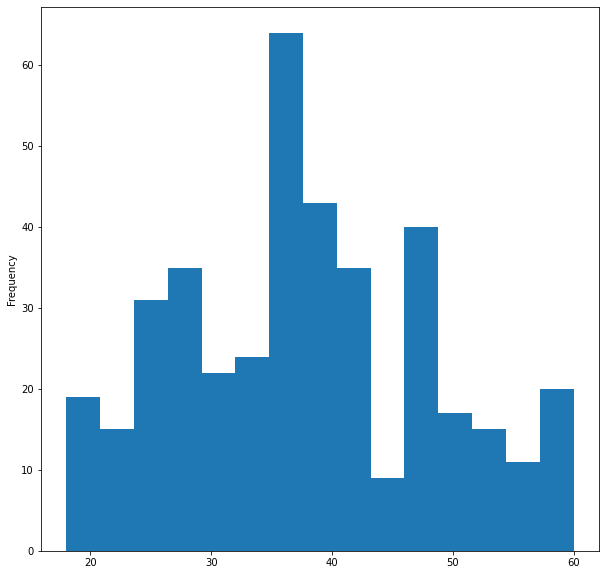

In [93]:
Data_frame['Age'].plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

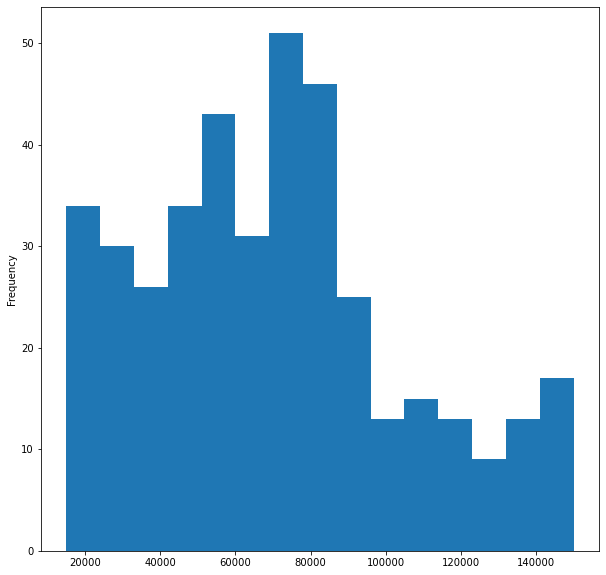

In [94]:
Data_frame['EstimatedSalary'].plot.hist(bins=15)

# DATA WRANGLING

In [95]:
Data_frame.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [96]:
Data_frame.drop('User ID', inplace=True, axis =1)

In [97]:
Data_frame.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [98]:
Gender= pd.get_dummies(Data_frame['Gender'],drop_first = True)
Gender.head(4)

,Male
0,1
1,1
2,0
3,0


In [99]:
Data_frame= pd.concat([Data_frame,Gender], axis = 1)
Data_frame.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [100]:
Data_frame.drop('Gender',inplace = True, axis=1)

In [101]:
Data_frame.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# DEFINING X AND Y VARIABLE

In [102]:
x = Data_frame.drop('Purchased',axis=1).values
y = Data_frame['Purchased'].values

In [103]:
x

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [104]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# SPLITING OF DATASET INTO TRAIN AND TEST

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# DATA TRANSFORMATION

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [107]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODELLING THE DATA

In [108]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

# PREDICTING THE MODEL

In [109]:
y_predicted= LR.predict(x_test)
print(y_predicted)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 1 1]


# EVALUTING THE MODEL

In [110]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.90      0.94      0.92        79\n           1       0.87      0.80      0.84        41\n\n    accuracy                           0.89       120\n   macro avg       0.89      0.87      0.88       120\nweighted avg       0.89      0.89      0.89       120\n'

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[74,  5],
       [ 8, 33]], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.8916666666666667